In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [3]:
traning_set=tf.keras.utils.image_dataset_from_directory(
    'train/train/',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),              
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 70295 files belonging to 38 classes.


In [4]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    'valid/valid/',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),              #128
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 17572 files belonging to 38 classes.


In [5]:
from keras.models import load_model

# Load the model
model = load_model("model.h5")

In [6]:
import json
with open('training_his.json', 'r') as file:
    loaded_history_json = file.read()
loaded_history_json = json.loads(loaded_history_json) 

Accurucy visualisation


In [10]:
train_loss,train_acc=model.evaluate(traning_set)
print(train_loss,train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 984s 448ms/step - accuracy: 0.9896 - loss: 0.0325
0.029613438993692398 0.9900846481323242


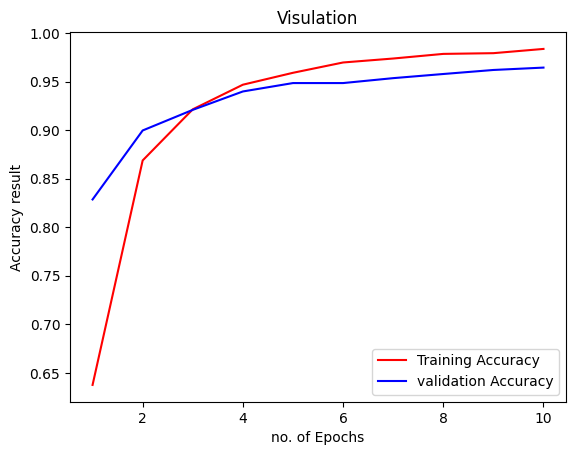

In [7]:
epochs = range(1, len(loaded_history_json['accuracy']) + 1)
plt.plot(epochs,  loaded_history_json['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs, loaded_history_json['val_accuracy'],color='blue',label='validation Accuracy')
plt.xlabel("no. of Epochs")
plt.ylabel("Accuracy result")
plt.title("Visulation")
plt.legend()
plt.show()

In [7]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [8]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'valid/valid/',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),              #128
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 17572 files belonging to 38 classes.


In [9]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 197s 358ms/step


(array([[1.00000000e+00, 1.09344452e-11, 5.03206282e-14, ...,
         6.61647451e-19, 8.45515435e-17, 2.97380662e-17],
        [1.00000000e+00, 1.65278884e-08, 3.00578226e-12, ...,
         3.45416628e-17, 5.68433104e-14, 1.60793207e-15],
        [1.00000000e+00, 3.28019888e-16, 1.17633003e-15, ...,
         5.18047796e-23, 6.38157280e-19, 3.26742837e-20],
        ...,
        [2.80369152e-12, 2.99006442e-15, 1.19396376e-11, ...,
         2.29423414e-14, 4.17586667e-14, 1.00000000e+00],
        [2.07296136e-09, 1.86100050e-12, 1.87158977e-09, ...,
         3.03604114e-10, 5.88148141e-11, 9.99999881e-01],
        [1.36419183e-11, 1.13076168e-13, 1.41462545e-11, ...,
         1.52959676e-13, 1.38719002e-11, 9.99999881e-01]], dtype=float32),
 (17572, 38))

In [14]:
predicted_categories=tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [12]:
true_categories=tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [23]:
Y_true=tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

Precision and recall

In [21]:

pip install scikit-learn



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.92      0.96      0.94       504
                                 Apple___Black_rot       0.99      0.98      0.99       497
                          Apple___Cedar_apple_rust       0.98      0.97      0.98       440
                                   Apple___healthy       0.93      0.94      0.94       502
                               Blueberry___healthy       0.90      0.99      0.94       454
          Cherry_(including_sour)___Powdery_mildew       0.98      1.00      0.99       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.92      0.93       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.96      0.

Confusion matricx

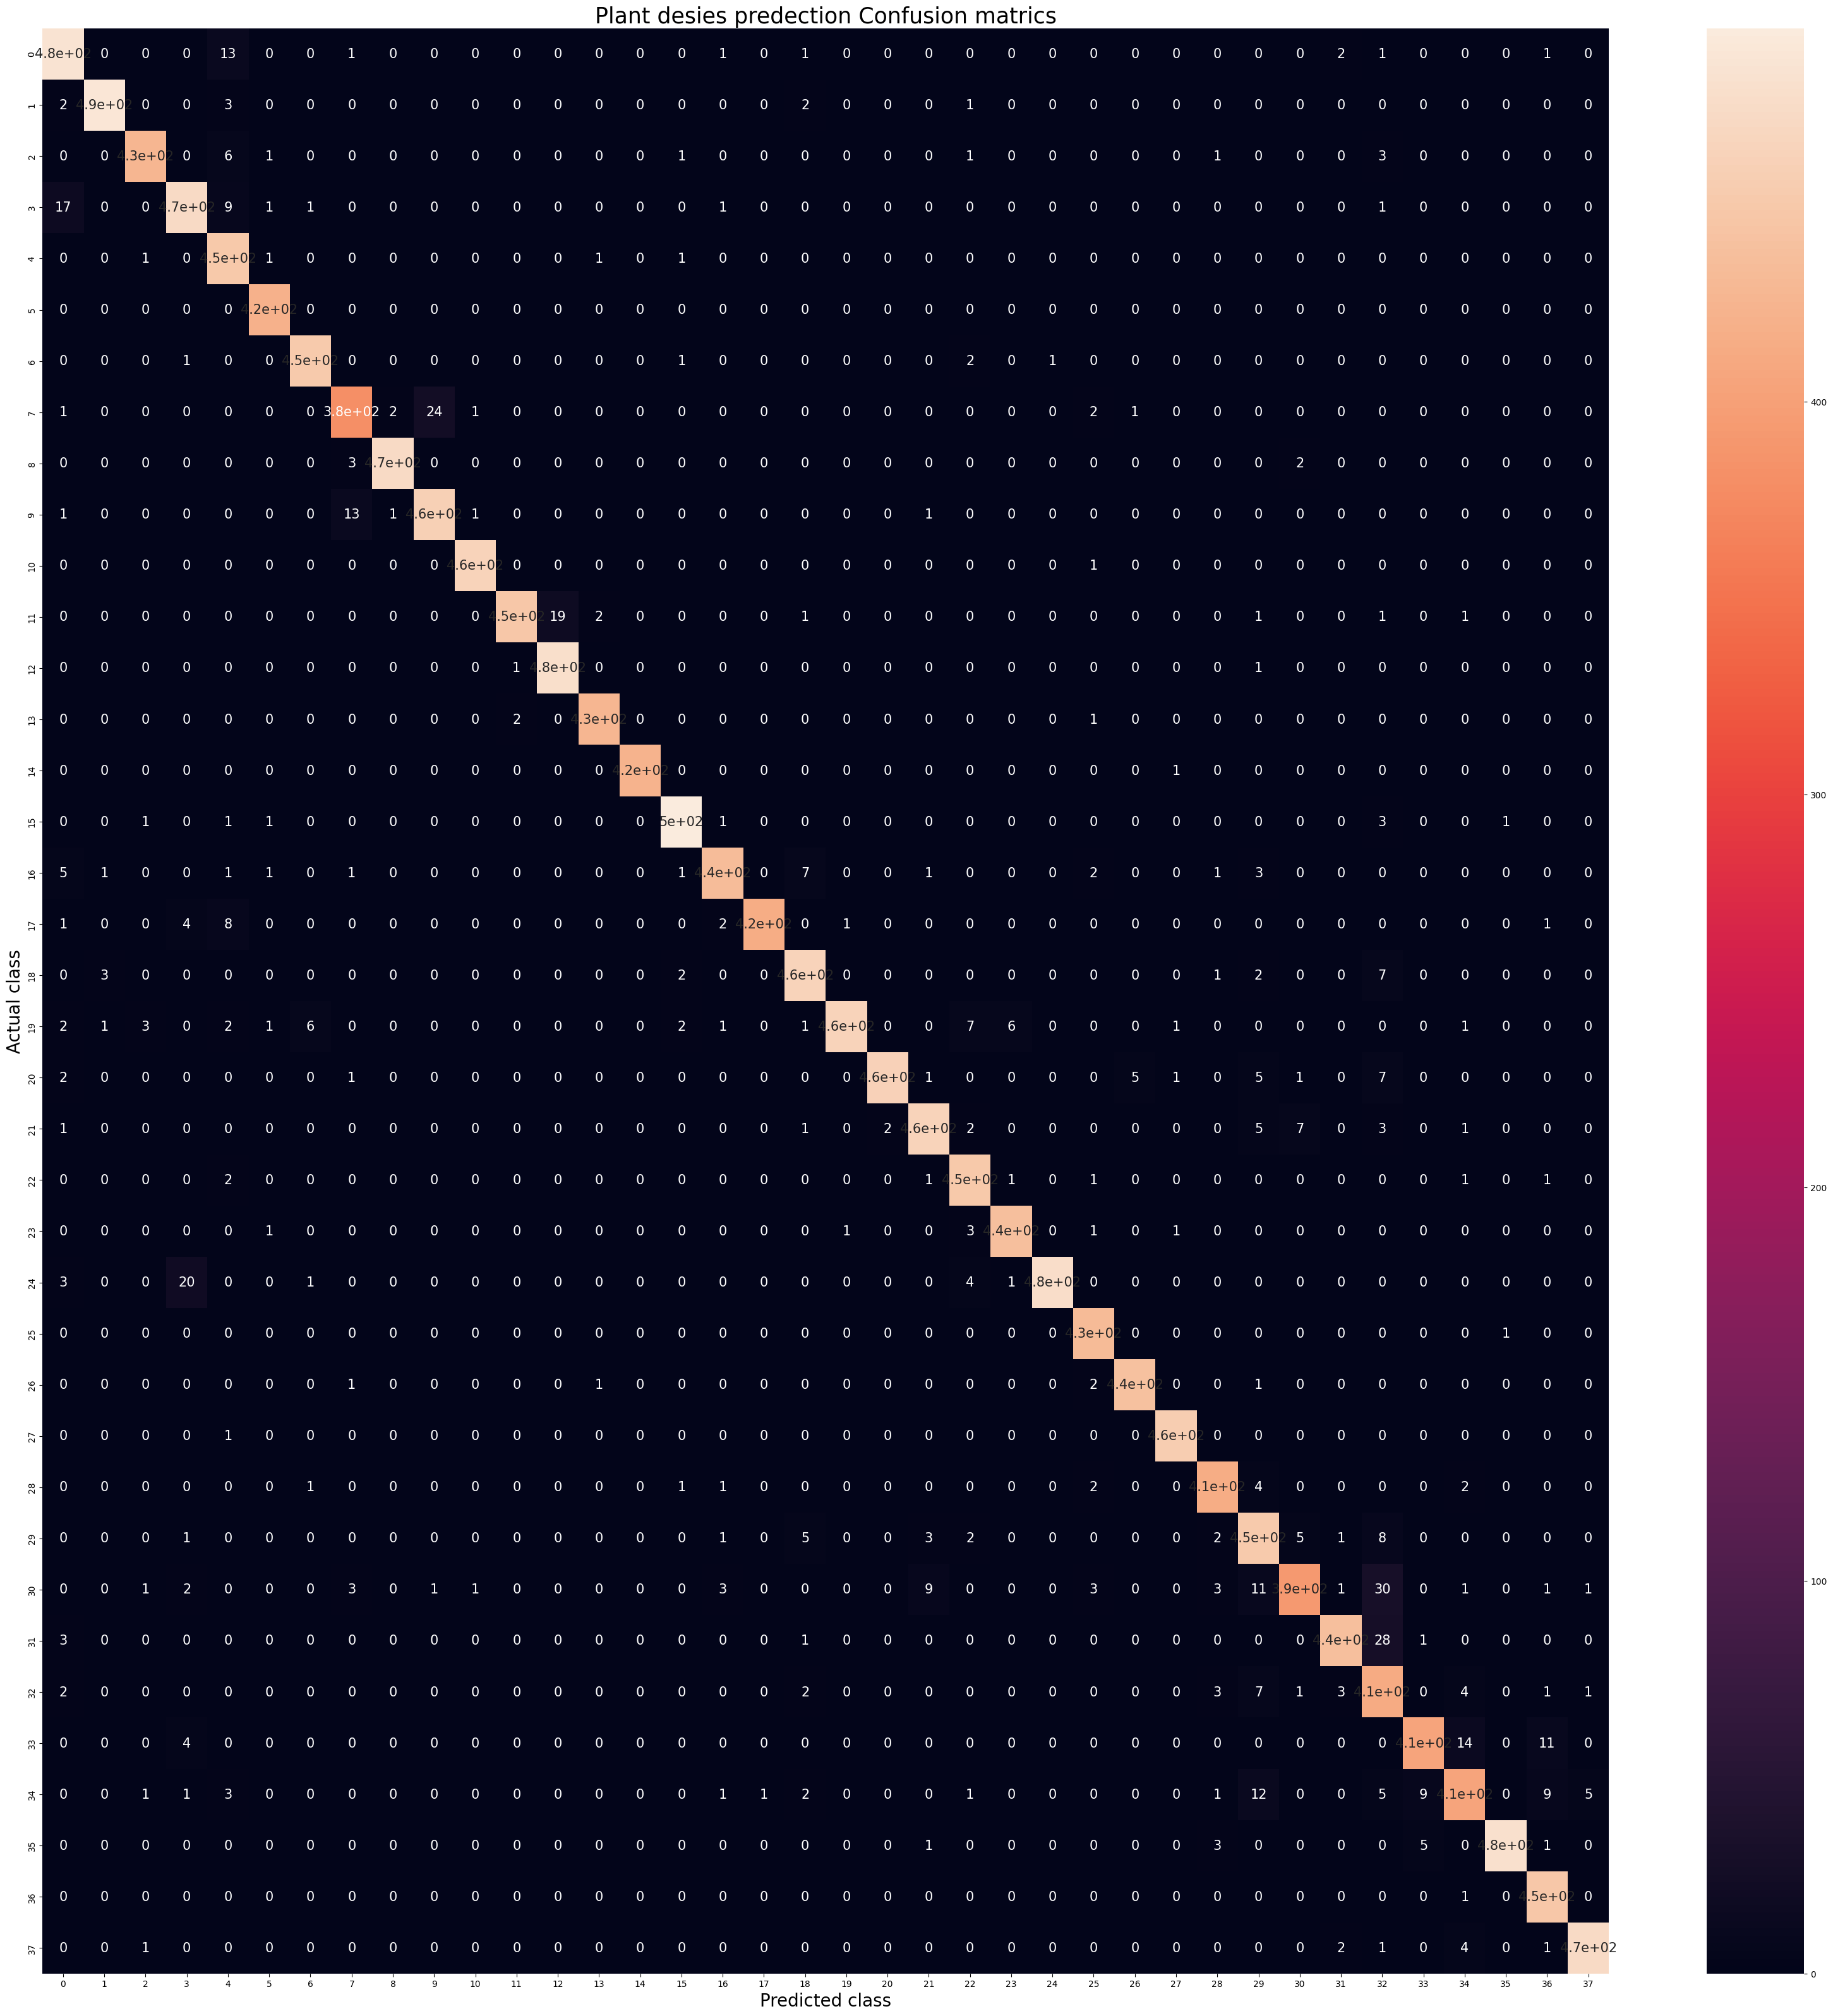

In [32]:
cm=confusion_matrix(Y_true,predicted_categories)
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':15})
plt.xlabel("Predicted class",fontsize=20)
plt.ylabel("Actual class",fontsize=20)
plt.title("Plant desies predection Confusion matrics",fontsize=25)
plt.show()
